In [264]:
import numpy as np
import pandas as pd
import math
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [265]:
## Function 1  ###
x = torch.unsqueeze(torch.linspace(-1, 1, 200), dim=1)

#choosing sin(x) as a nonliner function
y = (np.sin(5*np.pi*x))/(5*np.pi*x)

print('length of x:',x.shape)
print('length of y:',y.shape)

length of x: torch.Size([200, 1])
length of y: torch.Size([200, 1])


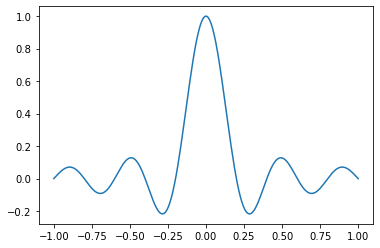

In [266]:
plt.plot(x,y)

In [267]:
#Function for model 1
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
        # output layer
        self.output = nn.Linear(5, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        x = self.output(x)            
        return x     
        

#defining the model
model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)

#Getting weights & bias
print("\nModel 1 weight and bias before training\n")

for param in model1.state_dict():
    print(param, "\t",model1.state_dict()[param])

Number of parameters in Model 1: 571

Model 1 weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.2178],
        [ 0.2307],
        [-0.4105],
        [ 0.1756],
        [ 0.8910]])
hiddenlayer1.bias 	 tensor([ 0.8728, -0.3675, -0.5912,  0.9288, -0.8736])
hiddenlayer2.weight 	 tensor([[ 0.1333, -0.0466, -0.2051,  0.3785, -0.1653],
        [-0.3411,  0.2289,  0.0473, -0.3968, -0.1440],
        [-0.3256,  0.1426, -0.3496,  0.4164,  0.2580],
        [ 0.3458,  0.2394,  0.3354,  0.0534,  0.3247],
        [-0.0397,  0.1343, -0.0639,  0.1176,  0.1217],
        [ 0.3956, -0.2806, -0.2043,  0.2158,  0.3101],
        [ 0.1460,  0.1260, -0.1418,  0.2634,  0.0850],
        [-0.2844,  0.4239,  0.3188,  0.2405,  0.1812],
        [ 0.1566,  0.0687,  0.2905, -0.2506,  0.3109],
        [ 0.0260, -0.0173, -0.3225,  0.3672,  0.3804]])
hiddenlayer2.bias 	 tensor([-0.0824,  0.4001, -0.0584, -0.2971, -0.0603,  0.3375,  0.1395,  0.4411,
        -0.1864, -0.1502])
hiddenlayer3.weight 	 tensor(

In [269]:
def testing(model,x,y):
    maximum_epoch = 20000
    epoch_array = []
    loss_array = []
    epoch = 0
    not_converged = True
    while not_converged:
        
        # for each x it the modedl predicts
        prediction = model(x)     
        loss = loss_function(prediction, y)
        #clearing gradients for next training, otherwise it provides wrong result
        optimizer.zero_grad()
        # backpropagation for computing gradients
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == maximum_epoch:
                print("Reached to Maximum number of Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [270]:
x = torch.tensor(x, dtype=torch.float32) 
y = torch.tensor(y, dtype=torch.float32)

C:\Users\abyad\AppData\Local\Temp/ipykernel_17104/2067748302.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
C:\Users\abyad\AppData\Local\Temp/ipykernel_17104/2067748302.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [271]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 0.0867
epoch: 200, loss = 0.0854
epoch: 300, loss = 0.0221
epoch: 400, loss = 0.0054
epoch: 500, loss = 0.0044
epoch: 600, loss = 0.0029
epoch: 700, loss = 0.0012
Converged: 0.0009941044


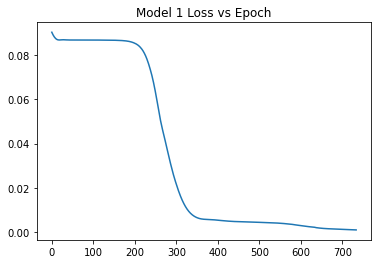

In [272]:
#error vs epoch plot
plt.plot(Model1epoch_array, Model1loss_array)
plt.title('Model 1 Loss vs Epoch')
plt.show()

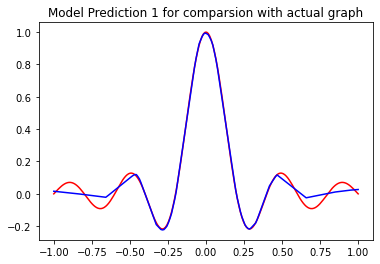

In [273]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1 for comparsion with actual graph')
plt.show()

In [274]:
#Function for model 2
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
        # output layer
        self.output = nn.Linear(4, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        

        
#defining the model
model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.00015)
#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)

#Getting weights & bias
print("\nModel 2 weight and bias before training\n")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572

Model 2 weight and bias before training

hiddenlayer1.weight 	 tensor([[ 0.1556],
        [-0.1460],
        [-0.7074],
        [-0.3682],
        [ 0.6933],
        [-0.3721],
        [-0.7046],
        [ 0.1455],
        [ 0.2065],
        [-0.2542]])
hiddenlayer1.bias 	 tensor([ 0.3361,  0.3881, -0.5577, -0.4590, -0.6859, -0.8726,  0.5291, -0.9114,
         0.7515,  0.8544])
hiddenlayer2.weight 	 tensor([[-0.1709, -0.0230, -0.1777, -0.0789, -0.1847, -0.1867, -0.0784,  0.1945,
          0.1398,  0.1302],
        [ 0.1028, -0.2361, -0.2322,  0.1284, -0.0470, -0.2316, -0.3003, -0.2268,
          0.1149,  0.2518],
        [-0.0769,  0.2120, -0.0327,  0.1255,  0.2611, -0.1765, -0.0635, -0.0458,
         -0.2260, -0.1095],
        [ 0.2922,  0.0380, -0.2611, -0.2926, -0.2351,  0.1214, -0.1248,  0.1932,
          0.3134, -0.1954],
        [ 0.0876, -0.0579, -0.1974,  0.0696, -0.1192,  0.0449,  0.3061, -0.1850,
         -0.0110, -0.1893],
        [-0.22

In [275]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.0825
epoch: 200, loss = 0.0061
epoch: 300, loss = 0.0048
epoch: 400, loss = 0.0045
epoch: 500, loss = 0.0040
epoch: 600, loss = 0.0036
epoch: 700, loss = 0.0034
epoch: 800, loss = 0.0033
epoch: 900, loss = 0.0032
epoch: 1000, loss = 0.0031
epoch: 1100, loss = 0.0031
epoch: 1200, loss = 0.0031
epoch: 1300, loss = 0.0016
epoch: 1400, loss = 0.0013
Converged: 0.0009171757


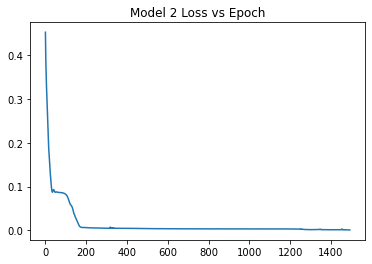

In [276]:
#error vs epoch plot
plt.plot(Model2epoch_array, Model2loss_array)
plt.title('Model 2 Loss vs Epoch')
plt.show()

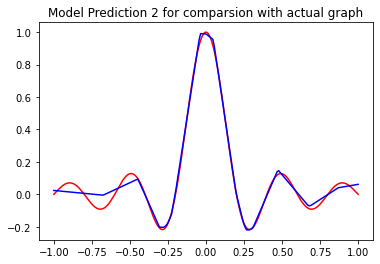

In [277]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 for comparsion with actual graph')
plt.show()

In [278]:
#Function for model 3
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer = nn.Linear(1, 190)   

        # output layer
        self.output = nn.Linear(190, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)            
        return x     
        

#defining the model
model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.0001)

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

#Getting weights & bias
print("Model 3 weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3 weight and bias before training
hiddenlayer.weight 	 tensor([[ 8.4019e-01],
        [-9.3115e-01],
        [-3.7446e-01],
        [-3.7348e-02],
        [ 2.4369e-01],
        [ 3.2610e-01],
        [-7.5737e-01],
        [ 5.7813e-01],
        [-5.4813e-01],
        [-6.8568e-02],
        [-3.2296e-01],
        [-8.5623e-02],
        [ 1.4672e-01],
        [ 6.5566e-01],
        [-6.0714e-01],
        [-6.5793e-02],
        [-9.9547e-01],
        [-6.4764e-01],
        [ 3.5587e-01],
        [ 5.3344e-01],
        [-6.1597e-01],
        [ 4.7033e-02],
        [ 3.3197e-01],
        [-6.8984e-01],
        [ 6.8081e-02],
        [-2.3525e-01],
        [-2.9720e-01],
        [ 8.8167e-04],
        [-3.4530e-01],
        [-9.9072e-01],
        [ 5.1364e-01],
        [ 6.4954e-01],
        [ 7.3948e-01],
        [-4.3788e-01],
        [-7.1899e-01],
        [ 2.6386e-01],
        [-4.1007e-02],
        [ 3.3569e-01],
        [ 9.3385e-02],
     

In [279]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.0646
epoch: 200, loss = 0.0499
epoch: 300, loss = 0.0367
epoch: 400, loss = 0.0266
epoch: 500, loss = 0.0186
epoch: 600, loss = 0.0131
epoch: 700, loss = 0.0096
epoch: 800, loss = 0.0071
epoch: 900, loss = 0.0054
epoch: 1000, loss = 0.0042
epoch: 1100, loss = 0.0035
epoch: 1200, loss = 0.0029
epoch: 1300, loss = 0.0024
epoch: 1400, loss = 0.0021
epoch: 1500, loss = 0.0019
epoch: 1600, loss = 0.0017
epoch: 1700, loss = 0.0015
epoch: 1800, loss = 0.0014
epoch: 1900, loss = 0.0012
epoch: 2000, loss = 0.0012
epoch: 2100, loss = 0.0011
epoch: 2200, loss = 0.0010
Converged: 0.0009994764


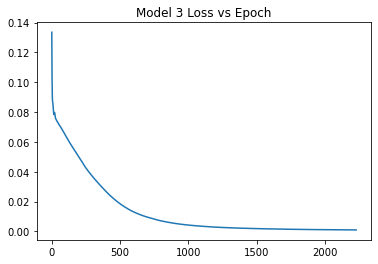

In [280]:
#error vs epoch plot
plt.plot(Model3epoch_array, Model3loss_array)
plt.title('Model 3 Loss vs Epoch')
plt.show()

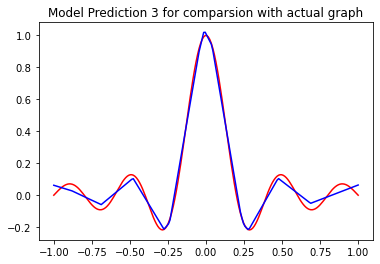

In [281]:
#Comparing the result with the actual plot

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graph
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Model Prediction 3 for comparsion with actual graph')
plt.show()

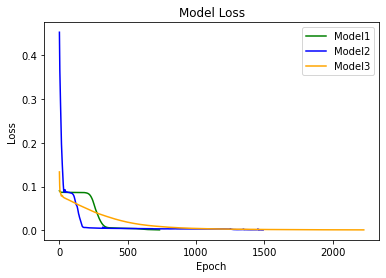

In [282]:
#Plotting the loss functions vs epochs

plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "blue")
plt.plot(Model3epoch_array,Model3loss_array, color = "orange")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch.png')
plt.show()


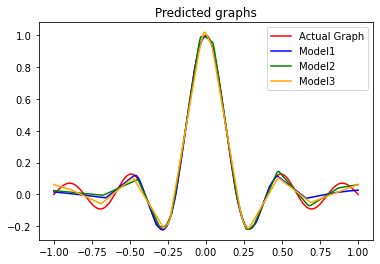

In [283]:
#Plotting the prediction

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graphs
plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.plot(x,Model2prediction.data.numpy(),color="green")
plt.plot(x,Model3prediction.data.numpy(),color="orange")
plt.title('Predicted graphs')
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.savefig('Predicted Graphs.png')
plt.show()

In [284]:
####################################End of function 1#########################################